In [2]:
import numpy as np
import pandas as pd
from pprint import pprint
import math

In [180]:
data = pd.read_csv("resources/dataset_train.csv")
data.head(5)

Index Hogwarts House First Name  Last Name    Birthday Best Hand  \
0      0      Ravenclaw     Tamara        Hsu  2000-03-30      Left   
1      1      Slytherin      Erich    Paredes  1999-10-14     Right   
2      2      Ravenclaw   Stephany      Braun  1999-11-03      Left   
3      3     Gryffindor      Vesta  Mcmichael  2000-08-19      Left   
4      4     Gryffindor     Gaston      Gibbs  1998-09-27      Left   

   Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0     58384.0 -487.886086   5.727180                       4.878861   
1     67239.0 -552.060507  -5.987446                       5.520605   
2     23702.0 -366.076117   7.725017                       3.660761   
3     32667.0  697.742809  -6.497214                      -6.977428   
4     60158.0  436.775204  -7.820623                            NaN   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0       4.722      272.035831     532.484226          5.231058   
1      -5.612     -487.340557     367.760303          4.107170   
2       6.140      664.893521     602.585284          3.555579   
3       4.026     -537.001128     523.982133         -4.809637   
4       2.236     -444.262537     599.324514         -3.444377   

   Transfiguration   Potions  Care of Magical Creatures     Charms  Flying  
0      1039.788281  3.790369                   0.715939 -232.79405  -26.89  
1      1058.944592  7.248742                   0.091674 -252.18425 -113.45  
2      1088.088348  8.728531                  -0.515327 -227.34265   30.42  
3       920.391449  0.821911                  -0.014040 -256.84675  200.64  
4       937.434724  4.311066                  -0.264070 -256.38730  157.98

In [181]:
#data = data.fillna(data.mean())
data = data.dropna()
data.head(5)

Index Hogwarts House First Name  Last Name    Birthday Best Hand  \
0      0      Ravenclaw     Tamara        Hsu  2000-03-30      Left   
1      1      Slytherin      Erich    Paredes  1999-10-14     Right   
2      2      Ravenclaw   Stephany      Braun  1999-11-03      Left   
3      3     Gryffindor      Vesta  Mcmichael  2000-08-19      Left   
5      5      Slytherin    Corrine    Hammond  1999-04-04     Right   

   Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0     58384.0 -487.886086   5.727180                       4.878861   
1     67239.0 -552.060507  -5.987446                       5.520605   
2     23702.0 -366.076117   7.725017                       3.660761   
3     32667.0  697.742809  -6.497214                      -6.977428   
5     21209.0 -613.687160  -4.289197                       6.136872   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0       4.722      272.035831     532.484226          5.231058   
1      -5.612     -487.340557     367.760303          4.107170   
2       6.140      664.893521     602.585284          3.555579   
3       4.026     -537.001128     523.982133         -4.809637   
5      -6.592     -440.997704     396.201804          5.380286   

   Transfiguration    Potions  Care of Magical Creatures     Charms  Flying  
0      1039.788281   3.790369                   0.715939 -232.79405  -26.89  
1      1058.944592   7.248742                   0.091674 -252.18425 -113.45  
2      1088.088348   8.728531                  -0.515327 -227.34265   30.42  
3       920.391449   0.821911                  -0.014040 -256.84675  200.64  
5      1052.845164  11.751212                   1.049894 -247.94549  -34.69

In [139]:
column_list = list(data.columns)
column_list

['Index',
 'Hogwarts House',
 'First Name',
 'Last Name',
 'Birthday',
 'Best Hand',
 'Arithmancy',
 'Astronomy',
 'Herbology',
 'Defense Against the Dark Arts',
 'Divination',
 'Muggle Studies',
 'Ancient Runes',
 'History of Magic',
 'Transfiguration',
 'Potions',
 'Care of Magical Creatures',
 'Charms',
 'Flying']

In [170]:
for name in column_list[6:19] :
    data[name] = (data[name] - data[name].mean()) / (data[name].max() - data[name].min())
data.head(5)

Index Hogwarts House First Name  Last Name    Birthday Best Hand  \
0      0      Ravenclaw     Tamara        Hsu  2000-03-30      Left   
1      1      Slytherin      Erich    Paredes  1999-10-14     Right   
2      2      Ravenclaw   Stephany      Braun  1999-11-03      Left   
3      3     Gryffindor      Vesta  Mcmichael  2000-08-19      Left   
4      4     Gryffindor     Gaston      Gibbs  1998-09-27      Left   

   Arithmancy  Astronomy  Herbology  Defense Against the Dark Arts  \
0    0.067654  -0.266110   0.209332                   2.656001e-01   
1    0.136124  -0.298473  -0.325374                   2.979632e-01   
2   -0.200521  -0.204681   0.300522                   2.041715e-01   
3   -0.131200   0.331801  -0.348642                  -3.323108e-01   
4    0.081371   0.200195  -0.409048                   2.799419e-18   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0    0.083591        0.227927       0.079597          0.109306   
1   -0.467291       -0.120589      -0.277314          0.055140   
2    0.159182        0.408229       0.231487          0.028555   
3    0.046489       -0.143381       0.061176         -0.374613   
4   -0.048932       -0.100819       0.224422         -0.308813   

   Transfiguration   Potions  Care of Magical Creatures    Charms    Flying  
0         0.050389 -0.118459                   0.120775  0.297028 -0.106067  
1         0.149990  0.071205                   0.022778 -0.247323 -0.294020  
2         0.301519  0.152359                  -0.072509  0.450068  0.018374  
3        -0.570400 -0.281254                   0.006183 -0.378216  0.387984  
4        -0.481785 -0.089903                  -0.033067 -0.365317  0.295353

In [172]:
df = data[column_list[6:19]]
df.head(5)

Arithmancy  Astronomy  Herbology  Defense Against the Dark Arts  \
0    0.067654  -0.266110   0.209332                   2.656001e-01   
1    0.136124  -0.298473  -0.325374                   2.979632e-01   
2   -0.200521  -0.204681   0.300522                   2.041715e-01   
3   -0.131200   0.331801  -0.348642                  -3.323108e-01   
4    0.081371   0.200195  -0.409048                   2.799419e-18   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0    0.083591        0.227927       0.079597          0.109306   
1   -0.467291       -0.120589      -0.277314          0.055140   
2    0.159182        0.408229       0.231487          0.028555   
3    0.046489       -0.143381       0.061176         -0.374613   
4   -0.048932       -0.100819       0.224422         -0.308813   

   Transfiguration   Potions  Care of Magical Creatures    Charms    Flying  
0         0.050389 -0.118459                   0.120775  0.297028 -0.106067  
1         0.149990  0.071205                   0.022778 -0.247323 -0.294020  
2         0.301519  0.152359                  -0.072509  0.450068  0.018374  
3        -0.570400 -0.281254                   0.006183 -0.378216  0.387984  
4        -0.481785 -0.089903                  -0.033067 -0.365317  0.295353

### MATPLOTLIB

In [142]:
import matplotlib.pyplot as plt

### V.2.1 Matplotlib Histogram

Faites un script nommé histogram.[extension] qui affiche un histogram répondant
à la question suivante :
Quel cours de Poudlard a une répartition des notes homogènes entre les quatres maisons ?

/sgoinfre/goinfre/Perso/aslusarc/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/sgoinfre/goinfre/Perso/aslusarc/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  2.,   3.,  20., 117., 304., 474., 397., 186.,  54.,   9.]),
 array([-0.57223273, -0.47223273, -0.37223273, -0.27223273, -0.17223273,
        -0.07223273,  0.02776727,  0.12776727,  0.22776727,  0.32776727,
         0.42776727]),
 <a list of 10 Patch objects>)

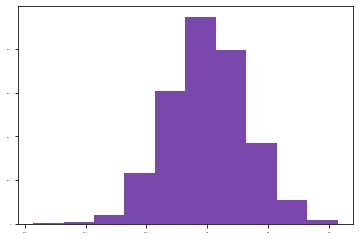

In [143]:
plt.hist(df['Arithmancy'], bins=10, color=np.random.rand(3))

In [144]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15,16), dpi= 100)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax, color=np.random.rand(3))
        ax.set_title(var_name[:6]+"Distr")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

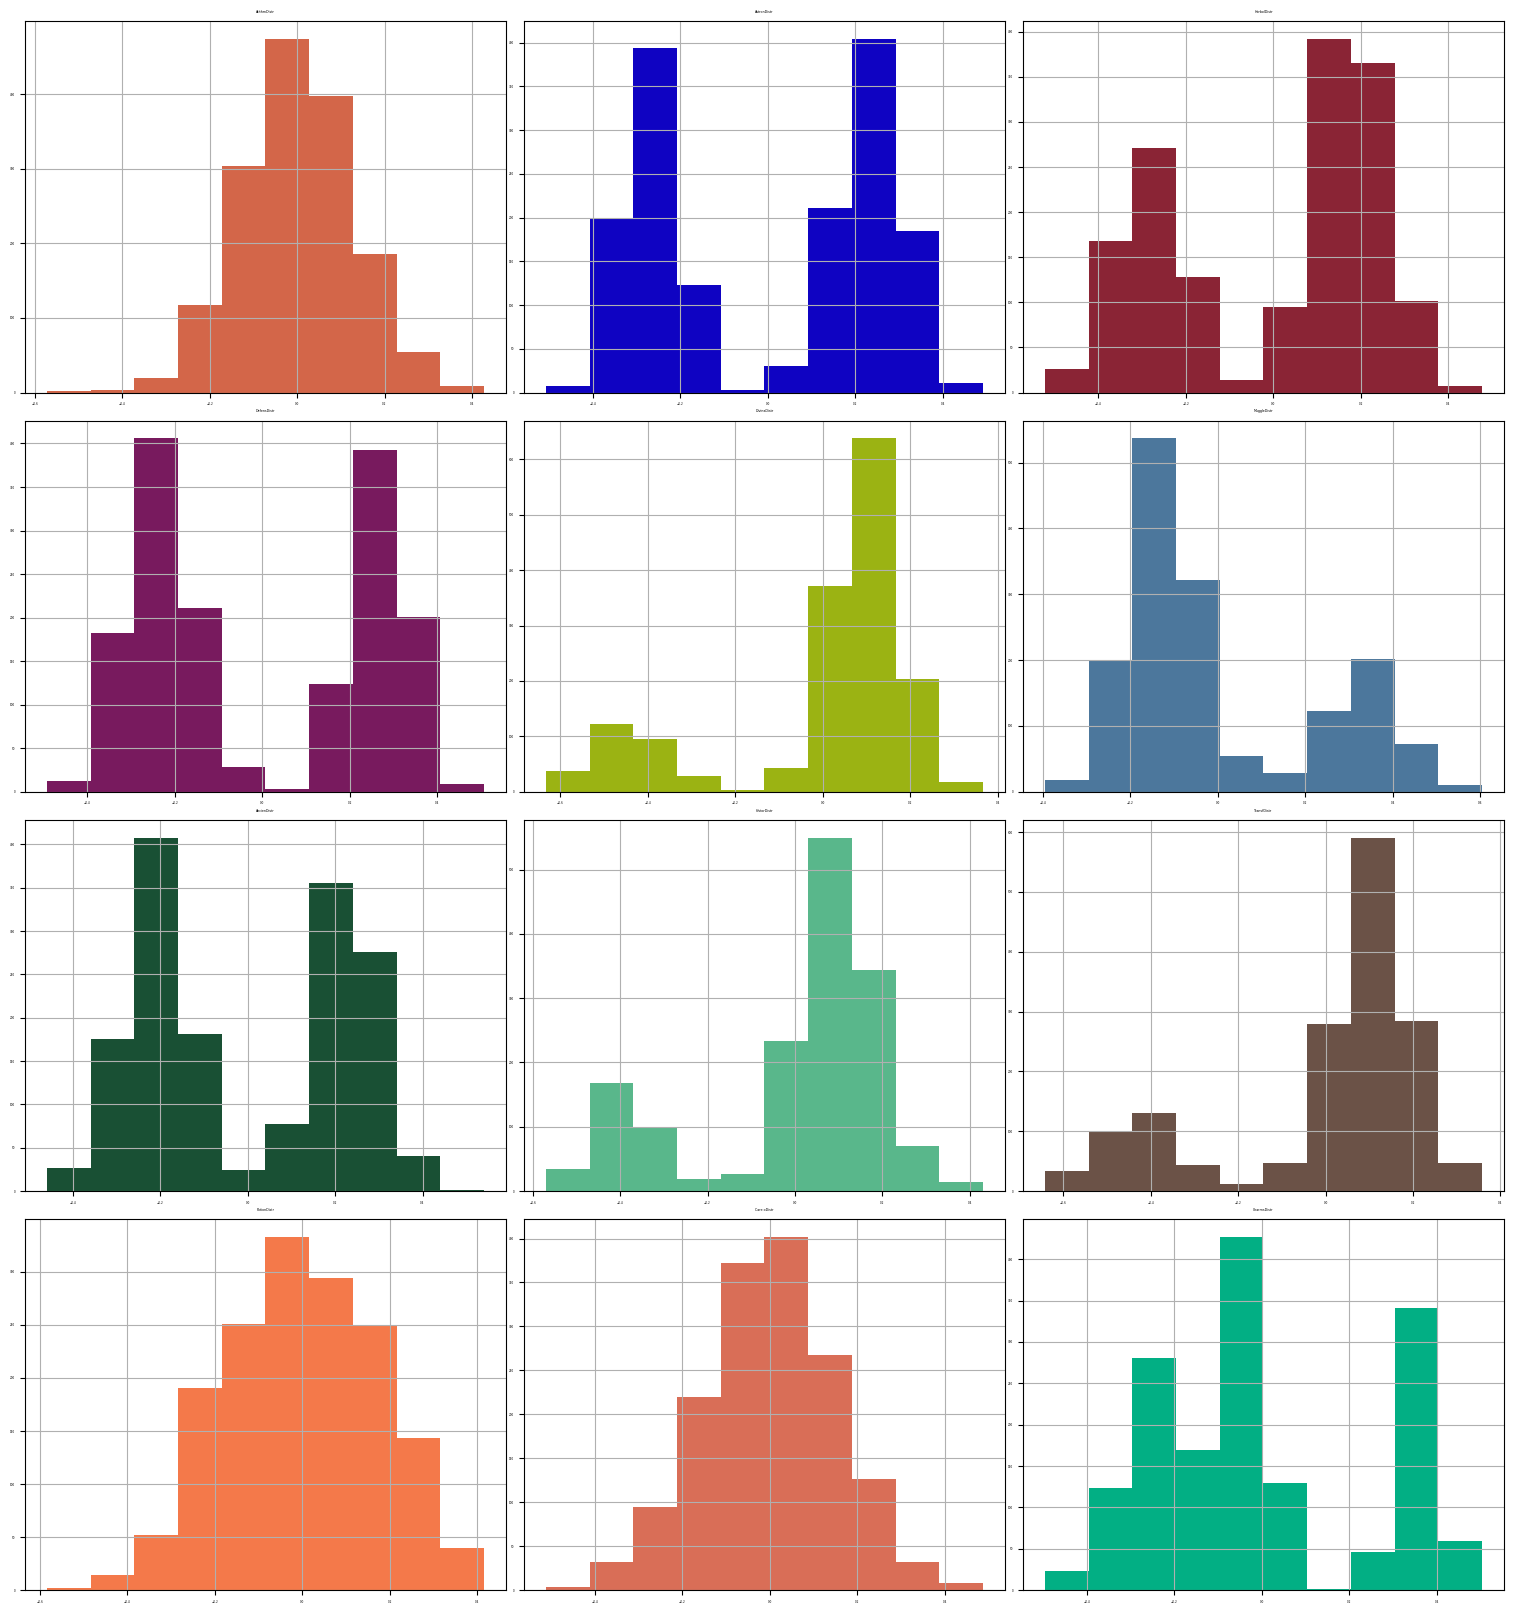

In [145]:
variables = column_list[6:18]
draw_histograms(df, variables, 4, 3)

### V.2.2 MatplotLib Scatterplot

Faites un script nommé scatter_plot.[extension] qui affiche un scatter plot répondant à la question suivante :
Quelles sont les deux features qui sont semblables ?

In [146]:
def visualize_scatter(x, y, color):
    fig = plt.figure()
    ax = plt.axes()
    ax.scatter(x, y, c=color, s=2)
    #plt.plot(x, x * slop + intercept, 'b', linewidth=0.2)
    plt.xlabel(x.name +' score')
    plt.ylabel(y.name +' score')
    plt.title('Figure 2: Training data ')
    plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


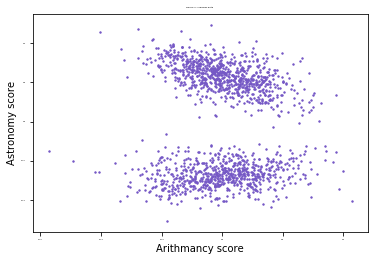

In [147]:
visualize_scatter(df['Arithmancy'], df['Astronomy'], np.random.rand(3))

In [148]:
def visualize_regr(x, y, theta):
    fig = plt.figure()
    ax = plt.axes()
    est = theta[0] + (x*theta[1])
    #print(est.shape)
    #print(x)
    #plt.gca().set(   xlim=(min(x), max(x)), ylim=(min(y), max(y))   )
    ax.scatter(x, y, c=np.random.rand(3), s=2)
    plt.plot(x, est, 'blue', linewidth=0.9)
    plt.xlabel(x.name +' score')
    plt.ylabel(y.name +' score')
    plt.title('Figure 2: Training data with decision boundary')
    plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


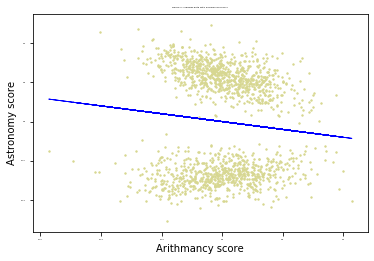

In [149]:
theta = [20, -0.004]
theta = [0,-0.2]
visualize_regr(df['Arithmancy'], df['Astronomy'], theta)

Text(0, 0.5, 'Care of Magical ')

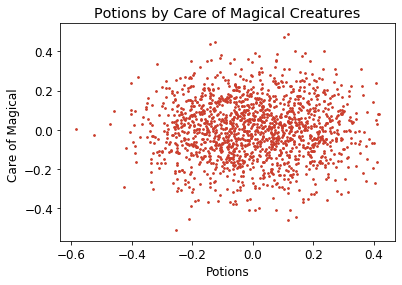

In [150]:
col_name1 = 'Potions'
col_name2 = 'Care of Magical Creatures'
plt.rc('font', size=12)
plt.rc('axes', labelsize=12) 
fig = plt.figure()
ax = plt.axes()
ax.scatter(x=df[col_name1], y=df[col_name2], color=np.random.rand(3), s=3)
ax.set_title(col_name1[:12]+" by "+col_name2)
plt.xlabel(col_name1[:14])
plt.ylabel(col_name2[:16])

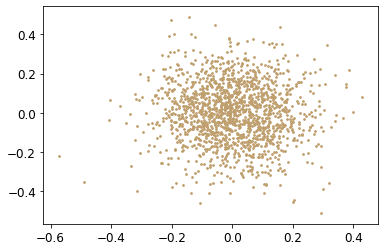

In [151]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(x=df['Arithmancy'], y=df['Care of Magical Creatures'], color=np.random.rand(3), s=3)

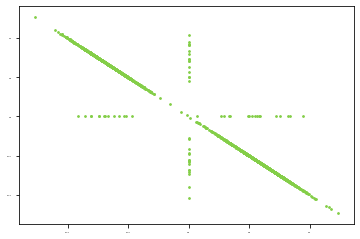

In [173]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(x=df['Astronomy'], y=df['Defense Against the Dark Arts'], color=np.random.rand(3), s=3)

In [153]:
np.random.rand(4)

array([0.49690592, 0.62274415, 0.26197351, 0.06989421])

In [154]:
def draw_scatters(df, variables, n_rows, n_cols):
    plt.rc('font', size=2)
    plt.rc('axes', labelsize=10) 
    fig=plt.figure(figsize=(10,10), dpi=100)
    for i, var_name1 in enumerate(variables):  
        for j, var_name2 in enumerate(variables):          
            #fig = plt.figure()
            #ax = plt.axes()
            #number = (i+1)*(j+1)
            number = i*len(variables)+j+1
            ax=fig.add_subplot(n_rows, n_cols, number)
            ax.scatter(x=df[var_name1], y=df[var_name2], color=np.random.rand(3), s=1)
            
            if (number-1) % n_cols==0:
                plt.ylabel(var_name1[:6])
            if number > (n_rows-1)* n_cols:
                plt.xlabel(var_name2[:6])
            
            #plt.title('Training data ')
            #plt.show()
    fig.tight_layout()  # Improves appearance a bit.
    
    plt.show()

13


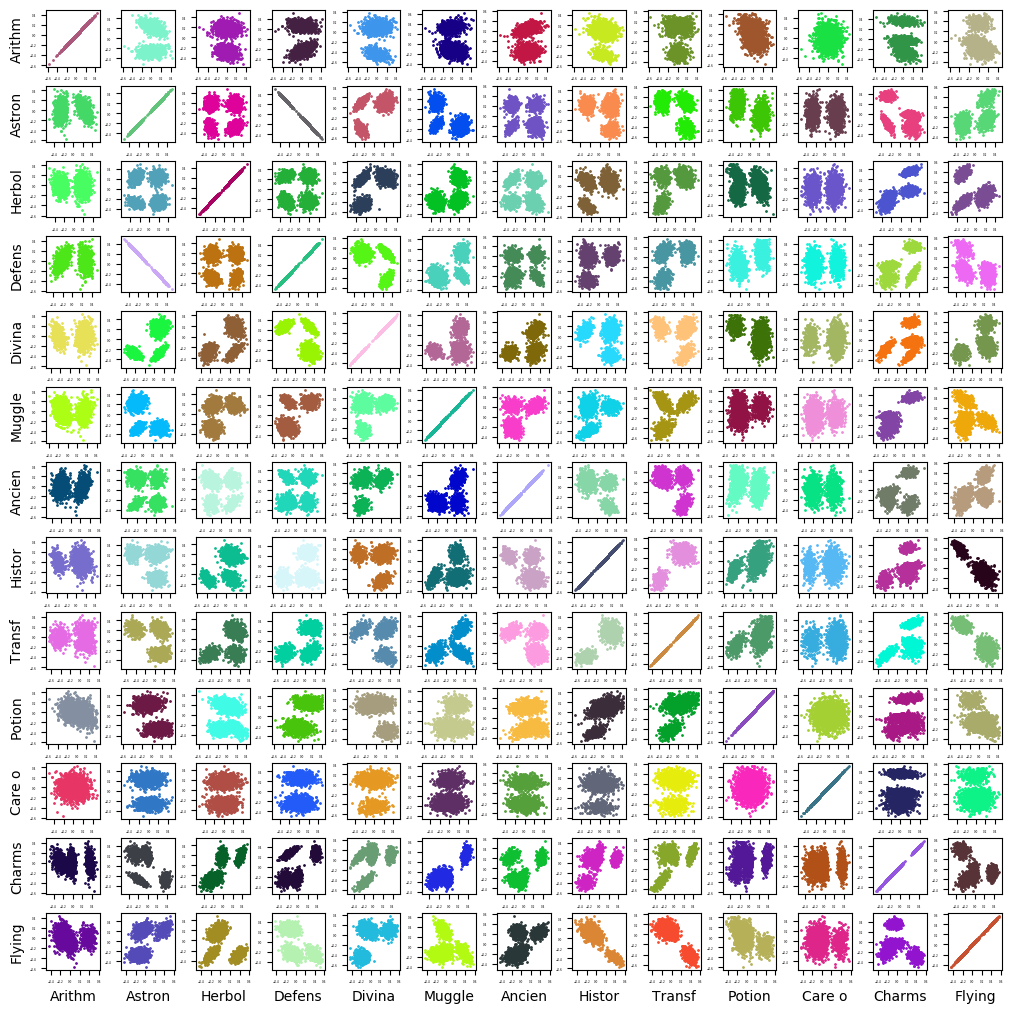

In [155]:
variables = column_list[6:19]
n_rows = len(variables)
n_cols = len(variables)
print(n_rows)
draw_scatters(df, variables, n_rows, n_cols)

### V.2.3 Matplotlib Pair plot

Faites un script nommé pair_plot.[extension] qui affiche un pair plot ou scatter
plot matrix (selon la librairie graphique que vous utiliserez).
À partir de cette visualisation, quelles caractéristiques allez-vous utiliser pour entraîner votre prochaine régression logistique ?

### SEABORN

In [159]:
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

### Cars

In [160]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df.head(5)

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

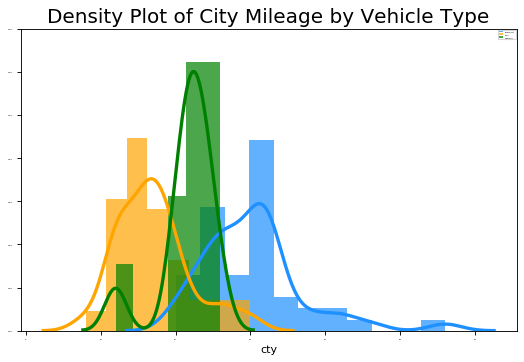

In [161]:
# Draw Plot
plt.figure(figsize=(8,5), dpi= 80)
sns.distplot(df.loc[df['class'] == 'compact', 'cty'], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', 'cty'], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', 'cty'], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=18)
plt.legend()
plt.show()

### Hogwarts Houses

In [182]:
df = data
df.head(10)

Index Hogwarts House First Name   Last Name    Birthday Best Hand  \
0       0      Ravenclaw     Tamara         Hsu  2000-03-30      Left   
1       1      Slytherin      Erich     Paredes  1999-10-14     Right   
2       2      Ravenclaw   Stephany       Braun  1999-11-03      Left   
3       3     Gryffindor      Vesta   Mcmichael  2000-08-19      Left   
5       5      Slytherin    Corrine     Hammond  1999-04-04     Right   
8       8     Gryffindor      Bella  Leatherman  1998-12-07      Left   
9       9     Hufflepuff     Hayden      Aponte  2001-10-13     Right   
10     10     Hufflepuff    Antonio     Denning  1998-05-21     Right   
11     11     Hufflepuff    Neville        Hall  2001-02-16      Left   
12     12     Hufflepuff      Rocky       Trask  2000-03-13     Right   

    Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0      58384.0 -487.886086   5.727180                       4.878861   
1      67239.0 -552.060507  -5.987446                       5.520605   
2      23702.0 -366.076117   7.725017                       3.660761   
3      32667.0  697.742809  -6.497214                      -6.977428   
5      21209.0 -613.687160  -4.289197                       6.136872   
8      20278.0  496.394945  -5.215891                      -4.963949   
9      46316.0  527.193585   7.922205                      -5.271936   
10     35619.0  604.933962   5.484189                      -6.049340   
11     46550.0  438.556950   5.320518                      -4.385569   
12     26647.0  709.094614   1.705389                      -7.090946   

    Divination  Muggle Studies  Ancient Runes  History of Magic  \
0        4.722      272.035831     532.484226          5.231058   
1       -5.612     -487.340557     367.760303          4.107170   
2        6.140      664.893521     602.585284          3.555579   
3        4.026     -537.001128     523.982133         -4.809637   
5       -6.592     -440.997704     396.201804          5.380286   
8        5.855     -626.552041     567.842402         -6.198661   
9        3.356     -398.101991     341.475606          4.978614   
10       5.358     -530.795896     484.872671          5.699654   
11       3.014     -518.560718     417.064093          4.801437   
12       7.091     -328.712955     435.502183          6.300649   

    Transfiguration    Potions  Care of Magical Creatures     Charms  Flying  
0       1039.788281   3.790369                   0.715939 -232.79405  -26.89  
1       1058.944592   7.248742                   0.091674 -252.18425 -113.45  
2       1088.088348   8.728531                  -0.515327 -227.34265   30.42  
3        920.391449   0.821911                  -0.014040 -256.84675  200.64  
5       1052.845164  11.751212                   1.049894 -247.94549  -34.69  
8        925.255500   1.086518                   1.147032 -252.27561  244.11  
9       1041.414665   2.068824                  -0.529579 -244.57527   -0.09  
10      1036.285357   9.293132                  -0.496553 -242.69168   64.61  
11      1046.761958   6.376966                  -0.919639 -244.91344   20.66  
12      1037.028317   8.110274                  -0.939144 -244.00363    7.56

In [183]:
df.columns

Index(['Index', 'Hogwarts House', 'First Name', 'Last Name', 'Birthday',
       'Best Hand', 'Arithmancy', 'Astronomy', 'Herbology',
       'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
       'Care of Magical Creatures', 'Charms', 'Flying'],
      dtype='object')

### V.2.1 Seaborn Histogram

Faites un script nommé histogram.[extension] qui affiche un histogram répondant
à la question suivante :
Quel cours de Poudlard a une répartition des notes homogènes entre les quatres maisons ?

ValueError: cannot convert float NaN to integer

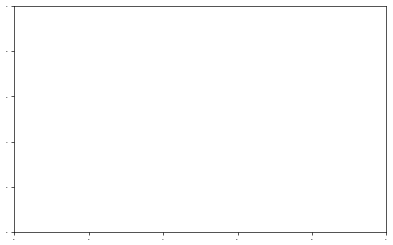

In [164]:
# Draw Plot
plt.figure(figsize=(8,5), dpi= 60)
sns.distplot(df.loc[df['Hogwarts House'] == 'Ravenclaw', 'Arithmancy'], color="dodgerblue", label="Ravenclaw", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0})
sns.distplot(df.loc[df['Hogwarts House'] == 'Slytherin', 'Arithmancy'], color="orange", label="Slytherin", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0})
sns.distplot(df.loc[df['Hogwarts House'] == 'Gryffindor', 'Arithmancy'], color="green", label="Gryffindor", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0})
sns.distplot(df.loc[df['Hogwarts House'] == 'Hufflepuff', 'Arithmancy'], color="orchid", label="Hufflepuff", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0})

plt.ylim(0, 4)

# Decoration
plt.title('Arithmancy Note by Hogwarts House Type', fontsize=18)
plt.legend()
#plt.show()

In [128]:
def sea_hist (df, name, ax=ax):
    # Draw Plot
    #plt.figure(figsize=(8,5), dpi= 60)
    sns.distplot(df.loc[df['Hogwarts House'] == 'Ravenclaw', name], color="dodgerblue", label="Ravenclaw", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0}, ax=ax)
    sns.distplot(df.loc[df['Hogwarts House'] == 'Slytherin', name], color="orange", label="Slytherin", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0}, ax=ax)
    sns.distplot(df.loc[df['Hogwarts House'] == 'Gryffindor', name], color="green", label="Gryffindor", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0}, ax=ax)
    sns.distplot(df.loc[df['Hogwarts House'] == 'Hufflepuff', name], color="orchid", label="Hufflepuff", hist_kws={'alpha':0.7}, kde_kws={'linewidth':0}, ax=ax)
    ax.set_title(name+' Note by Hogwarts House Type', fontsize=12)
    plt.ylim(0, 6)

    # Decoration
    #plt.title(name+' Note by Hogwarts House Type', fontsize=18)
    #plt.legend()
    plt.show()

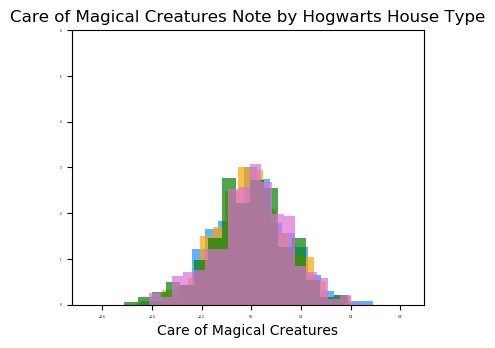

In [129]:
#for name in columns_list :
fig=plt.figure(figsize=(10,8), dpi=100)
ax=fig.add_subplot(2,2,4)
sea_hist (data, 'Care of Magical Creatures', ax)

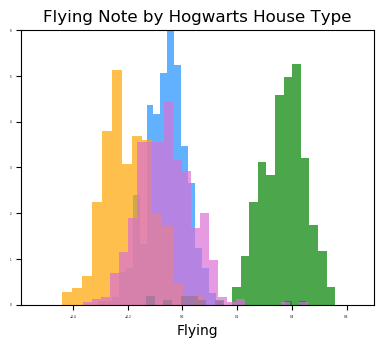

In [130]:
fig=plt.figure(figsize=(10,8), dpi=100)
ax=fig.add_subplot(2,2,4)
sea_hist(data, "Flying", ax)

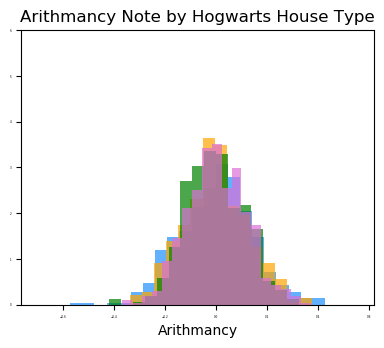

In [131]:
fig=plt.figure(figsize=(10,8), dpi=100)
ax=fig.add_subplot(2,2,4)
sea_hist(data, "Arithmancy", ax)

In [132]:
variables = column_list[6:19]
def draw_sea_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15,16), dpi= 100)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        #print(var_name)
        #cours = data[var_name]
        sea_hist(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [133]:
variables = column_list[6:19]
def draw_sea_histograms(df, variables, n_cols):
    n_rows = (len(variables) / n_cols) + 1
    fig=plt.figure(figsize=(10,10), dpi= 100)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        #print(var_name)
        #cours = data[var_name]
        sea_hist(df, var_name, ax=ax)
    fig.tight_layout()  # Improves appearance a bit.
    plt.ylim(0, 6)
    # Decoration
    #plt.title(name+' Note by Hogwarts House Type', fontsize=18)
    plt.legend()
    plt.show()

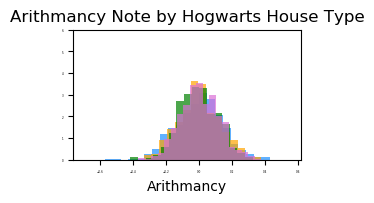

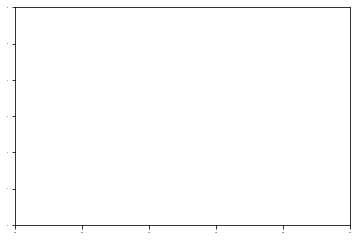

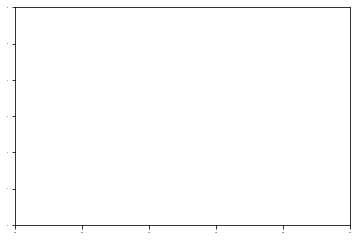

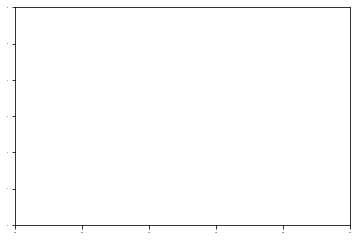

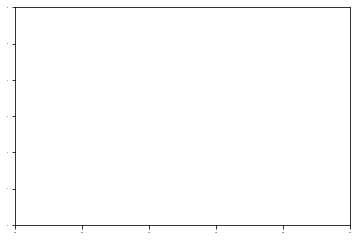

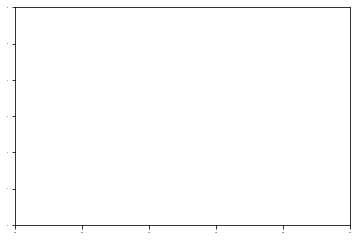

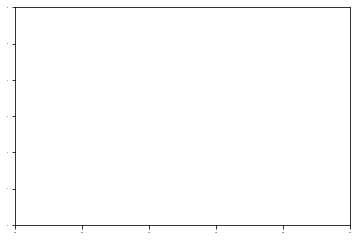

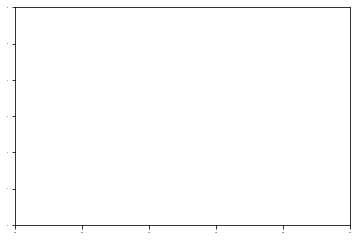

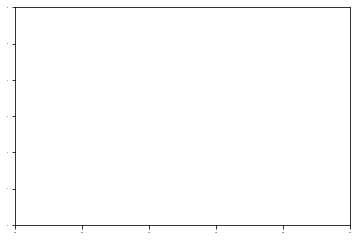

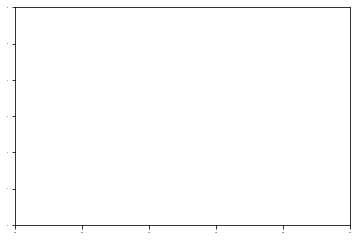

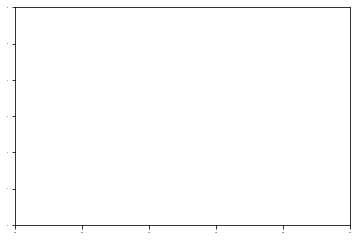

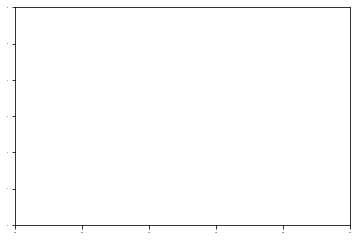

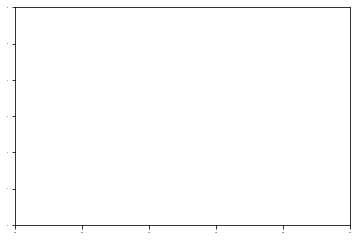

No handles with labels found to put in legend.


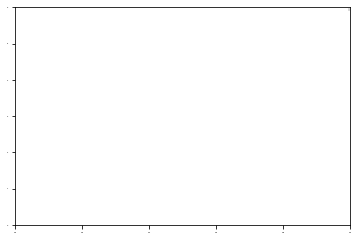

In [134]:
draw_sea_histograms(df, variables, 3)

### V.2.2 Seaborn Scatter plot

Faites un script nommé scatter_plot.[extension] qui affiche un scatter plot répondant à la question suivante :
Quelles sont les deux features qui sont semblables ?

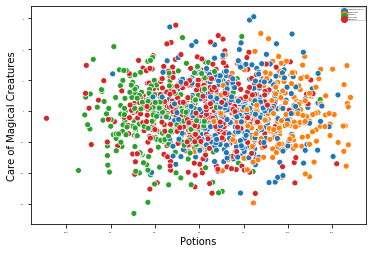

In [187]:
ax = sns.scatterplot(data=data, x='Potions', y='Care of Magical Creatures', hue="Hogwarts House")

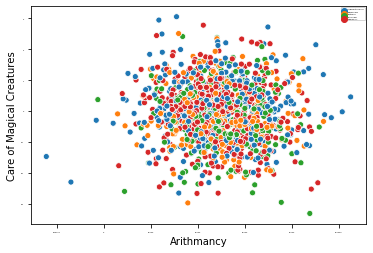

In [195]:
ax = sns.scatterplot(data=data, x='Arithmancy', y='Care of Magical Creatures', hue="Hogwarts House")

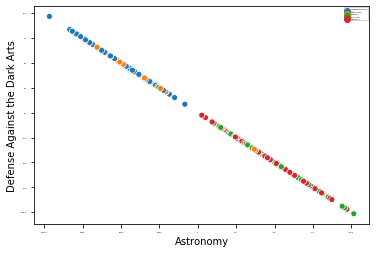

In [192]:
ax = sns.scatterplot(data=data, x='Astronomy', y='Defense Against the Dark Arts', hue="Hogwarts House")

### V.2.3 Seaborn Pair plot

Faites un script nommé pair_plot.[extension] qui affiche un pair plot ou scatter
plot matrix (selon la librairie graphique que vous utiliserez).
À partir de cette visualisation, quelles caractéristiques allez-vous utiliser pour entraîner votre prochaine régression logistique ?

In [93]:
df.columns

Index(['Index', 'Hogwarts House', 'First Name', 'Last Name', 'Birthday',
       'Best Hand', 'Arithmancy', 'Astronomy', 'Herbology',
       'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
       'Care of Magical Creatures', 'Charms', 'Flying'],
      dtype='object')

In [94]:
df = data[column_list[1:]]

/sgoinfre/goinfre/Perso/aslusarc/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/sgoinfre/goinfre/Perso/aslusarc/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


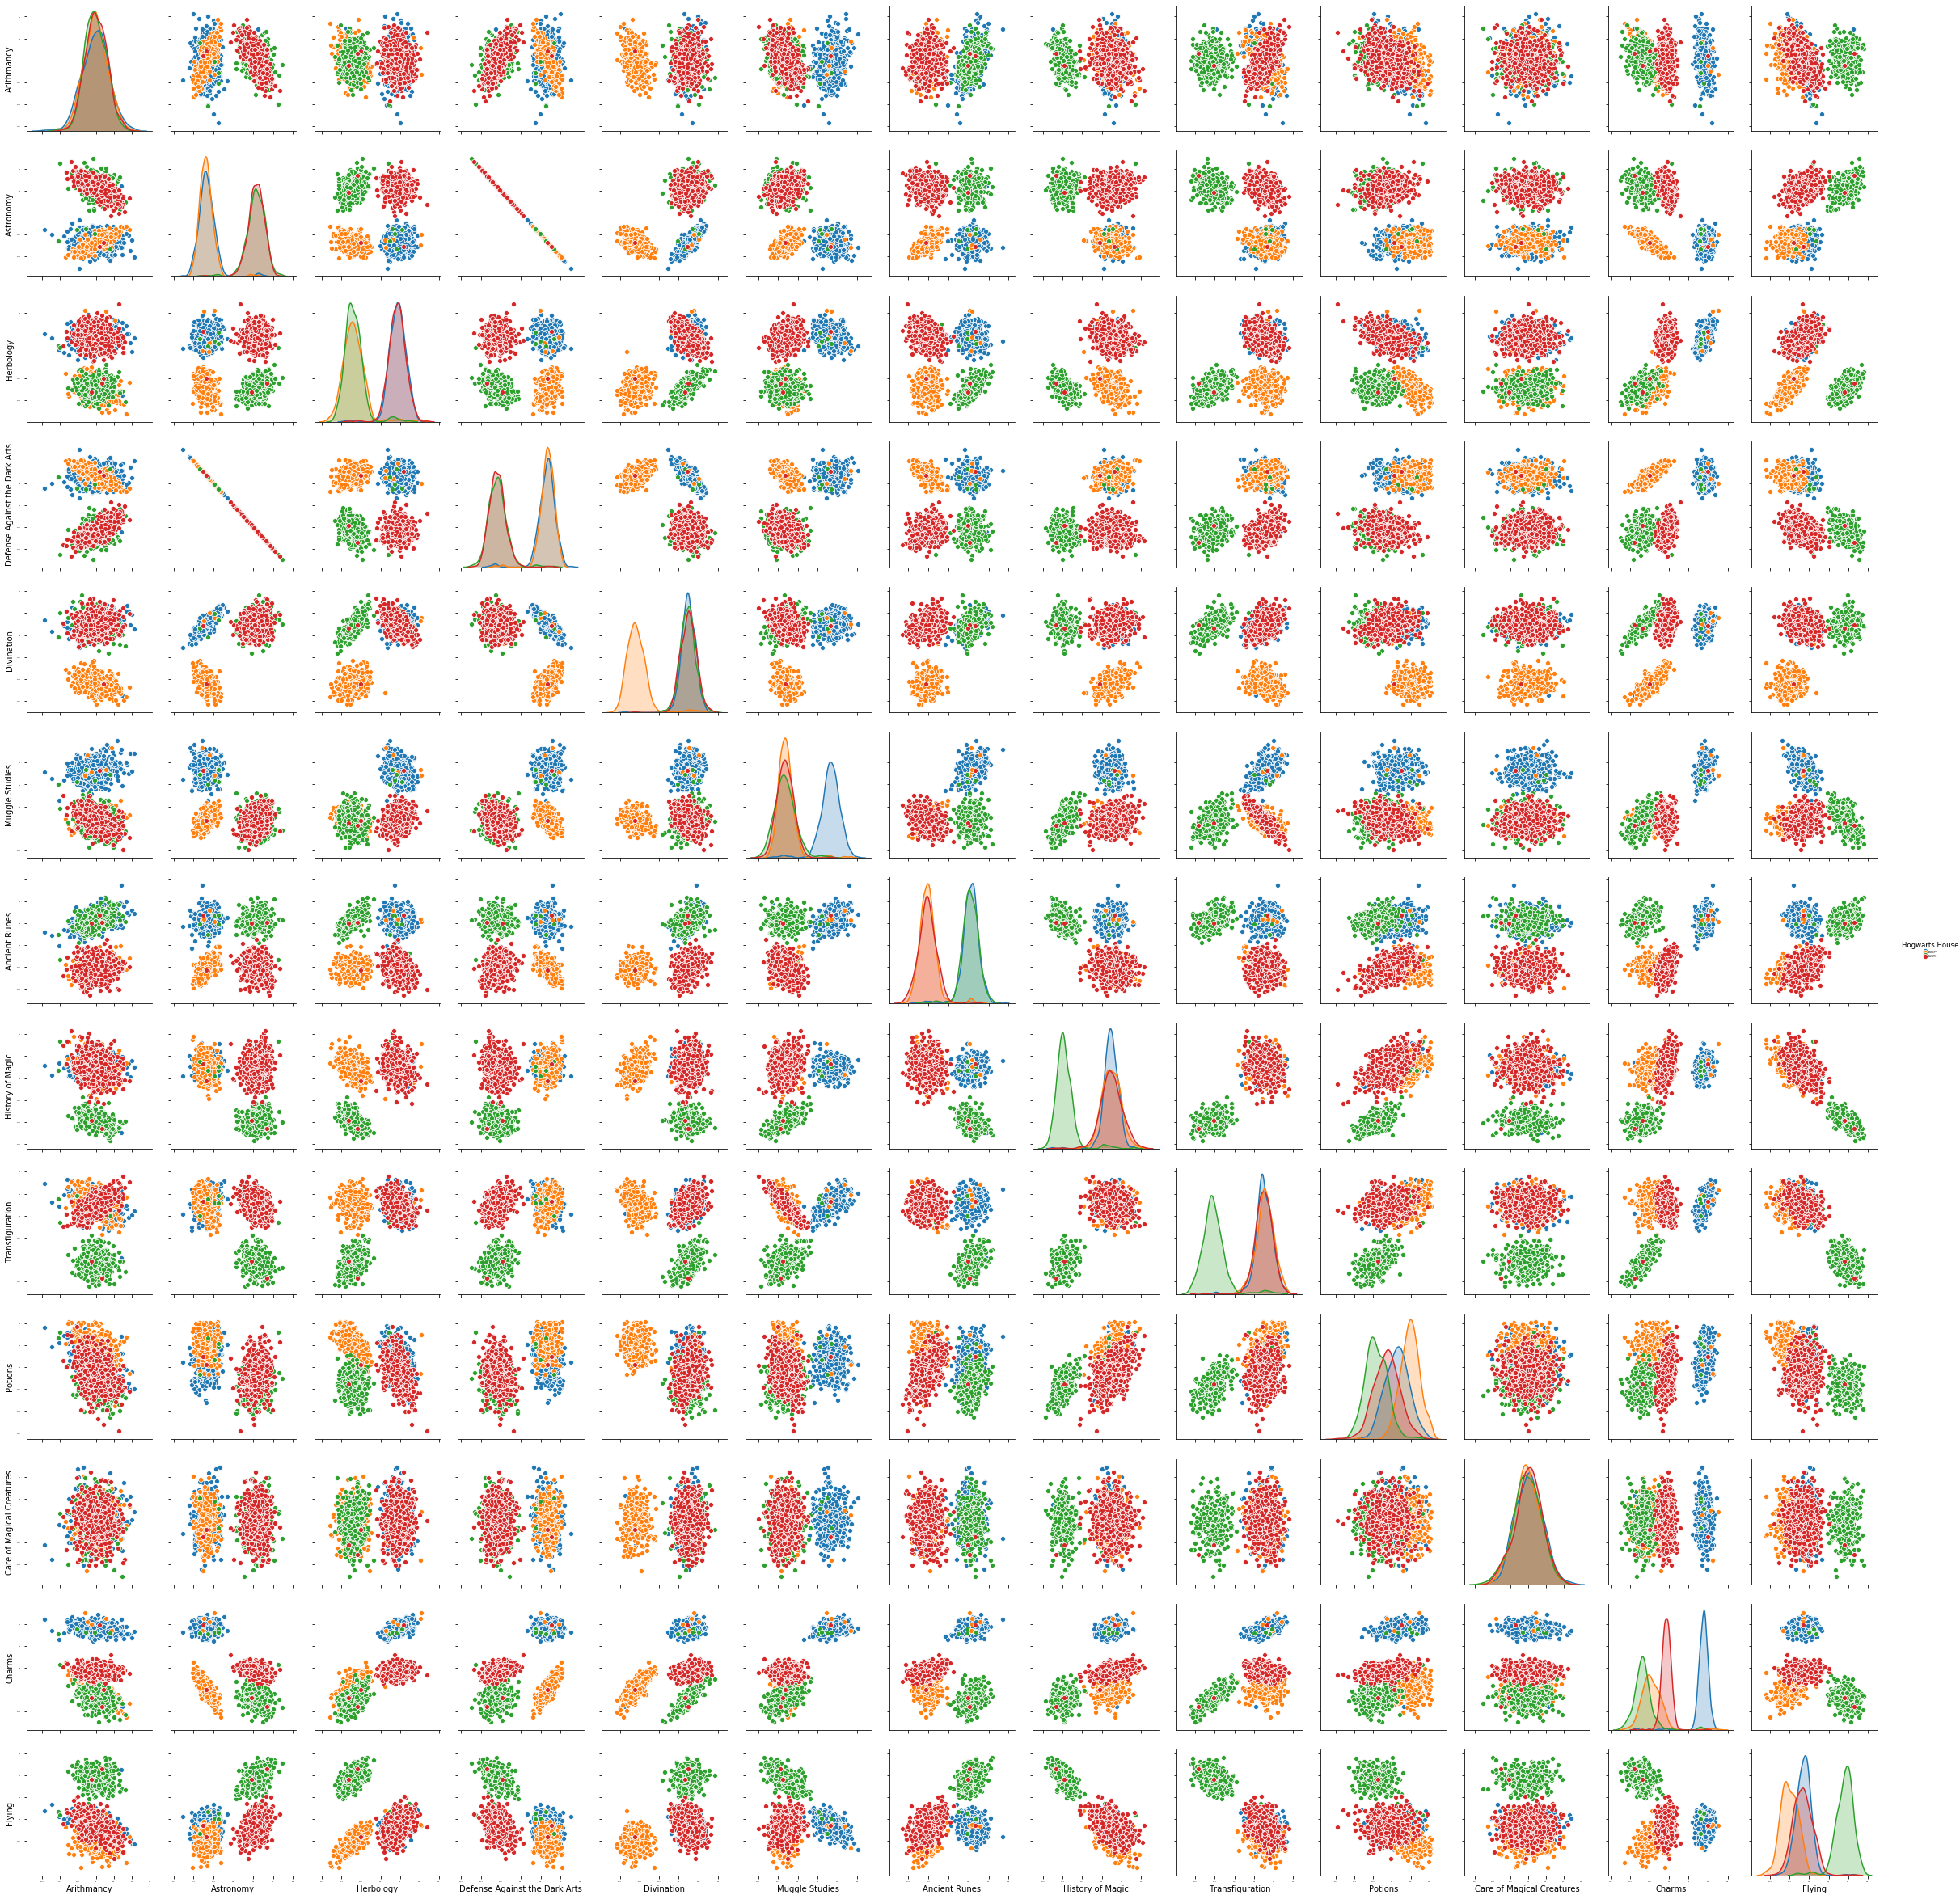

In [95]:
sns.pairplot(data=df, hue="Hogwarts House");